## Disponível online

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/mntf/trabalho3.ipynb)

Esse python notebook está disponível online no GitHub através do link:

* [GitHub/carlos-adir/UnB-Courses/mntf/trabalho3](https://github.com/carlos-adir/UnB-Courses/blob/main/mntf/trabalho3.ipynb)

In [1]:
import numpy as np
import tqdm
from matplotlib import pyplot as plt
from typing import List, Tuple, Callable, Optional
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
from typing import Tuple
warnings.filterwarnings("error")

In [2]:
def plot_field(xmesh: Tuple[float], ymesh: Tuple[float], zvals: np.ndarray):
    xmesh = np.array(xmesh, dtype="float64")
    ymesh = np.array(ymesh, dtype="float64")
    zvals = np.array(zvals, dtype="float64")
    assert xmesh.ndim == 1
    assert ymesh.ndim == 1
    assert zvals.ndim == 2
    assert zvals.shape == (len(ymesh), len(xmesh))
    x, y = np.meshgrid(xmesh, ymesh)
    fig, ax = plt.subplots(figsize=(10, 10))
    dx = 0.05*(xmesh[-1]-xmesh[0])/2.
    dy = 0.05*(ymesh[-1]-ymesh[0])/2.
    extent = [xmesh[0]-dx, xmesh[-1]+dx, ymesh[0]-dy, ymesh[-1]+dy]
    im = ax.imshow(zvals[::-1], cmap="viridis", interpolation='nearest', aspect='auto', extent=extent)
    cp = ax.contour(x, y, zvals, 10, colors="k")
    div  = make_axes_locatable(ax)
    cax  = div.append_axes('bottom', size='5%', pad=0.6)
    cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
    return ax
    

### A formulação de Diferenças Finitas

Primeiramente fazemos a formulação de diferenças finitas

$$
\dfrac{\partial T}{\partial t} \approx
\begin{bmatrix}
\dfrac{-1}{2\delta t} & 0 & \dfrac{1}{2\delta t}
\end{bmatrix} \cdot
\begin{bmatrix}
T(x, \ t-\delta t) \\ T(x, \ t) \\ T(x, \ t+\delta t)
\end{bmatrix} $$
$$
\dfrac{\partial^2T}{\partial x} \approx
\begin{bmatrix}
\dfrac{1}{\delta x^2} & \dfrac{-2}{\delta x^2} & \dfrac{1}{\delta x^2}
\end{bmatrix} \cdot
\begin{bmatrix}
T(x-\delta x, \ t) \\ T(x, \ t) \\ T(x+\delta x, \ t)
\end{bmatrix} $$

Então

$$
\left[\dfrac{\partial T}{\partial t}  - \dfrac{\partial^2T}{\partial x}\right]_{\begin{matrix}x=x_i \\ t=t_j\end{matrix}} \approx 
\underbrace{\begin{bmatrix}
 \dfrac{-1}{\delta x^2}  & \dfrac{-1}{\delta t} & \dfrac{2}{\delta x^2} & \dfrac{1}{\delta t} & \dfrac{-1}{\delta x^2}
\end{bmatrix}}_{\text{stencil}}
\begin{bmatrix}
T_{j, i-1} \\ T_{j-1, i} \\ T_{j, i} \\ T_{j+1, i} \\  T_{j, i+1}
\end{bmatrix} $$

Usamos a notação

$$
\begin{cases}T_{j, i} = T(x_i, \ t_j)\\ T_{j, i\pm k} = T(x_i \pm k\cdot \delta x, \ t_j) \\ T_{j \pm k, i} = T(x_i, \ t_j \pm k\cdot \delta t)\end{cases} $$

Tem muitos *stencils* diferentes que podem ser usados. Neste exemplo obtemos um erro de ordem $\Theta(\delta x^2, \ \delta t^2)$, mas tem outros:

* Diferença progressiva de $t$ (2 pontos) e centrada em $x$ (3 pontos)

> \begin{align*}
\left[\dfrac{\partial T}{\partial t}\right]_{\begin{matrix}x=x_i \\ t=t_j\end{matrix}} & = \dfrac{- T_{j,i} + T_{j+1, i}}{\delta t} + \Theta (\delta t) \\
\left[\dfrac{\partial^2 T}{\partial x^2}\right]_{\begin{matrix}x=x_i \\ t=t_j\end{matrix}} & = \dfrac{T_{j,i-1}-2T_{j, i} + T_{j,i+1}}{\delta x^2} + \Theta(\delta x^2)\end{align*}

* Diferença centrada em $t$ (3 pontos) e centrada em $x$ (3 pontos)

> \begin{align*}
\left[\dfrac{\partial T}{\partial t}\right]_{\begin{matrix}x=x_i \\ t=t_j\end{matrix}} & = \dfrac{- T_{j-1,i} + T_{j+1, i}}{2\delta t} + \Theta (\delta t^2) \\
\left[\dfrac{\partial^2 T}{\partial x^2}\right]_{\begin{matrix}x=x_i \\ t=t_j\end{matrix}} & = \dfrac{T_{j,i-1}-2T_{j, i} + T_{j,i+1}}{\delta x^2} + \Theta(\delta x^2)\end{align*}

* Diferença centrada em $t$ (5 pontos) e centrada em $x$ (5 pontos)

> \begin{align*}
\left[\dfrac{\partial T}{\partial t}\right]_{\begin{matrix}x=x_i \\ t=t_j\end{matrix}} & = \dfrac{T_{j-2,i}-8T_{j-1, i} + 8 T_{j+1, i}-T_{j+2,i}}{12\delta t} + \Theta (\delta t^4) \\
\left[\dfrac{\partial^2 T}{\partial x^2}\right]_{\begin{matrix}x=x_i \\ t=t_j\end{matrix}} & = \dfrac{-T_{j,i-2}+16T_{j,i-1}-30T_{j,i}+16T_{j,i+1}-T_{j,i+2}}{12\delta x^2} + \Theta(\delta x^4)\end{align*}

No caso, usaremos apenas a primeira. Para menor erro pode-se usar as outras.

### Exercício 1

$$
\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2} \ \ \ \ \ \forall \ (x, \ t) \ \text{on} \ \Omega
$$

No domínio 

$$\Omega = \underbrace{\left[0, \ 2\right]}_{x} \times \underbrace{\left[0, \ \infty\right)}_{t}$$

E condições de contorno

$$
T(0, \ t) = T(2, \ t) = 0 \ \ \ \ \ \forall 0 \le t
$$

$$
T(x, \ 0) = \sin \left(\frac{1}{2}\pi x\right) \ \ \ \ 0 \le x \le 2
$$

A solução exata é dada por

$$
T_{exact}(x, \ t) = \exp \left(-\frac{1}{4}\pi^2 t\right) \cdot \sin \left(\frac{1}{2}\pi x\right)
$$

Então encontramos a solução numérica

Usando diferenças progressivas em $t$ e diferenças centradas em $x$ com 3 pontos, temos 

$$
\dfrac{- T_{j,i} + T_{j+1, i}}{\delta t} = \dfrac{T_{j,i-1}-2T_{j, i} + T_{j,i+1}}{\delta x^2} 
$$

Isolando $T_{j+1, i}$

$$
T_{j+1, \ i} = T_{j, \ i} + \dfrac{\delta t}{\delta x^2} \left(T_{j,i-1}-2T_{j, i} + T_{j,i+1}\right)
$$ 

Então dividimos a malha: No domínio $n_x$ em $n_{x}$ pontos, e no dominio $t$ em $n_{t}$ pontos.

In [3]:
xmin, xmax = 0, 2
tmin, tmax = 0, 3
nx, nt = 11, 126
dx = (xmax-xmin)/(nx-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
tmesh = np.linspace(tmin, tmax, nt)

Então colocamos os valores $T_{j,i}$ conhecidos no contorno:

$$
T(0, \ t) = 0 \Rightarrow T_{j,0} = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ j = 0, \ 1, \ \cdots, \ n_t-1
$$
$$
T(2, \ t) = 0 \Rightarrow T_{j,n_x-1} = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ j = 0, \ 1, \ \cdots, \ n_t -1
$$
$$
T(x, \ 0) = \sin \dfrac{1}{2}\pi x \Rightarrow T_{0,i} = \sin \dfrac{1}{2}\pi x_i \ \ \ \ \ \ \ \ \ \ i = 0, \ 1, \ \cdots, \ n_x - 1
$$

In [4]:
T = np.zeros((nt, nx), dtype="float64")  # Result matrix
for j, tj in enumerate(tmesh):
    T[j, 0] = 0
    T[j, nx-1] = 0
for i, xi in enumerate(xmesh):
    T[0, i] = np.sin(0.5*np.pi*xi)

Então fazemos as iterações para encontrar os demais valores

In [5]:
stencilx = np.array([1, -2, 1]) * dt/dx**2
for j in range(nt-1):
    for i in range(1, nx-1):
        T[j+1, i] = T[j, i] + stencilx @ T[j, i-1:i+2]

In [6]:
Tanalitic = np.tensordot(np.exp(-np.pi**2 * tmesh/4), np.sin(np.pi*xmesh/2), axes=0)

E mostramos os resultados

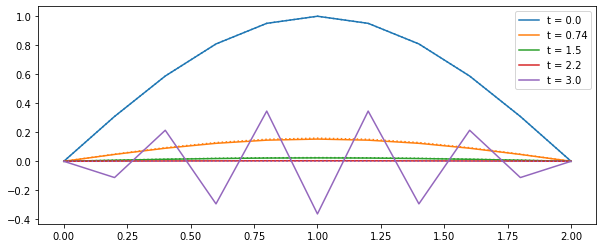

In [7]:
ncurves = 5
indexs = [int(curveindex) for curveindex in np.linspace(0, nt-1, ncurves)]
plt.figure(figsize=(10, 4))
for j in indexs:
    pl = plt.plot(xmesh, Tanalitic[j, :], ls="dotted")
    color = pl[0].get_color()
    plt.plot(xmesh, T[j, :], label=f"t = {tmesh[j]:.2}", color=color)
plt.legend()

Text(0.5, 1.0, 'Numerical solution $T_{num}$ at final time')

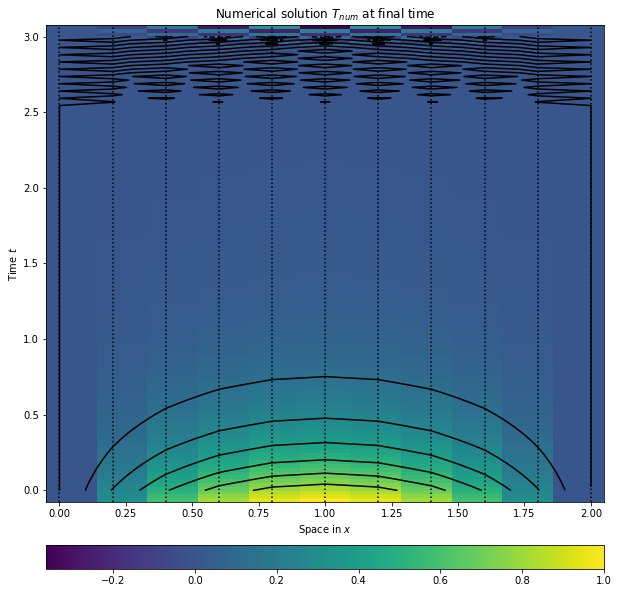

In [8]:
ax = plot_field(xmesh, tmesh, T)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Time $t$")
ax.set_title(r"Numerical solution $T_{num}$ at final time")

Text(0.5, 1.0, 'Error of numerical solution  $|T_{num}-T_{exac}|$')

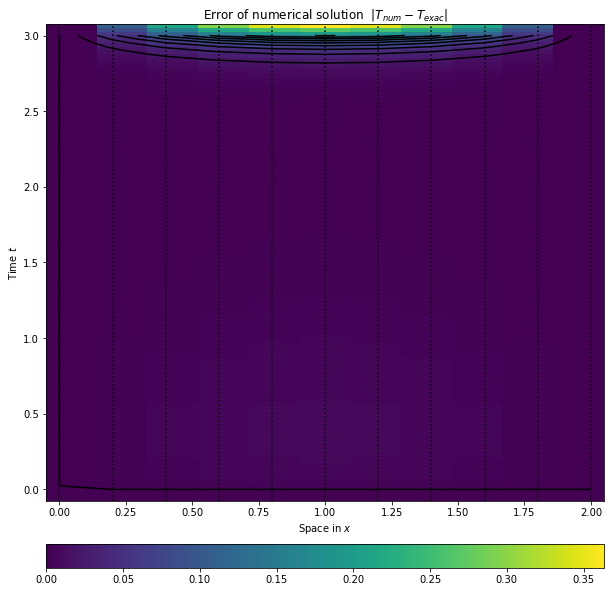

In [9]:
diff = np.abs(T-Tanalitic)
ax = plot_field(xmesh, tmesh, diff)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Time $t$")
ax.set_title(r"Error of numerical solution  $|T_{num}-T_{exac}|$")

### Exercicio 2


$$
\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2}
$$

No dominio 

$$\Omega = \underbrace{\left[0, \ 1\right]}_{x} \times \underbrace{\left[0, \ \infty\right)}_{t}$$

E condições de contorno

$$
T(0, \ t) = T(1, \ t) = 0 \ \ \ \ \ \forall 0 \le t
$$

$$
T(x, \ 0) = 1 \ \ \ \ 0 < x < 1
$$

A solução exata é dada por

$$
T_{exact}(x, \ t) = \sum_{n=1}^{\infty} \dfrac{4}{(2n-1)\pi} \cdot \exp \left(-(2n-1)^2\pi^2 t\right) \cdot \sin \left((2n-1)\pi x\right)
$$

Então resolvemos numericamente

In [10]:
xmin, xmax = 0, 1
tmin, tmax = 0, 0.3
nx, nt = 51, 1497
dx = (xmax-xmin)/(nx-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nt, nx), dtype="float64")  # Result matrix
for i, xi in enumerate(xmesh):
    T[0, i] = 1
for j, tj in enumerate(tmesh):
    T[j, 0] = 0
    T[j, nx-1] = 0

stencilx = np.array([1, -2, 1]) * dt/dx**2
for j in range(nt-1):
    for i in range(1, nx-1):
        T[j+1, i] = T[j, i] + stencilx @ T[j, i-1:i+2]

In [11]:
Tanalitic = np.zeros(T.shape)
for n in range(1, 21):
    exppart = np.exp(-(2*n-1)**2*(np.pi**2)*tmesh)
    sinpart = np.sin((2*n-1)*np.pi*xmesh)
    Tanalitic += np.tensordot(exppart, sinpart, axes=0)/(2*n-1)
Tanalitic *= 4/np.pi

E mostramos os resultados

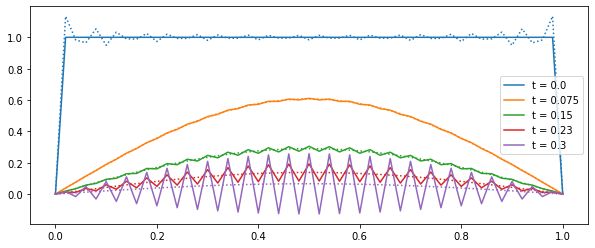

In [12]:
ncurves = 5
indexs = [int(curveindex) for curveindex in np.linspace(0, nt-1, ncurves)]
plt.figure(figsize=(10, 4))
for j in indexs:
    pl = plt.plot(xmesh, Tanalitic[j, :], ls="dotted")
    color = pl[0].get_color()
    plt.plot(xmesh, T[j, :], label=f"t = {tmesh[j]:.2}", color=color)
plt.legend()

Text(0.5, 1.0, 'Numerical solution $T_{num}$ at final time')

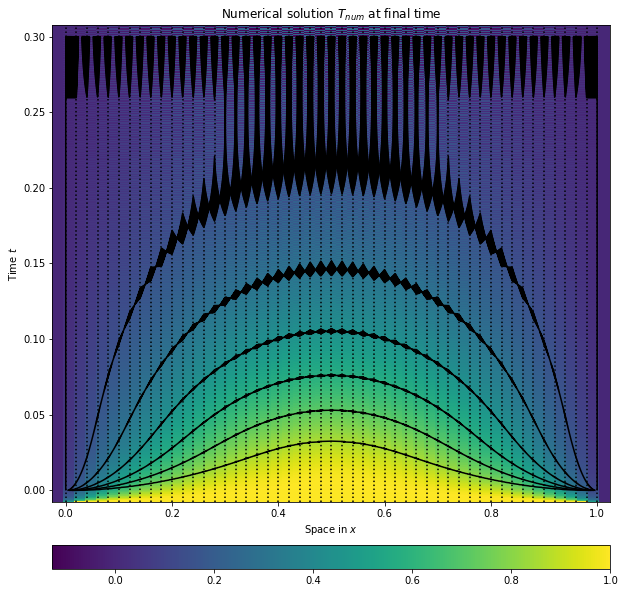

In [13]:
ax = plot_field(xmesh, tmesh, T)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Time $t$")
ax.set_title(r"Numerical solution $T_{num}$ at final time")

Text(0.5, 1.0, 'Error of numerical solution  $|T_{num}-T_{exac}|$')

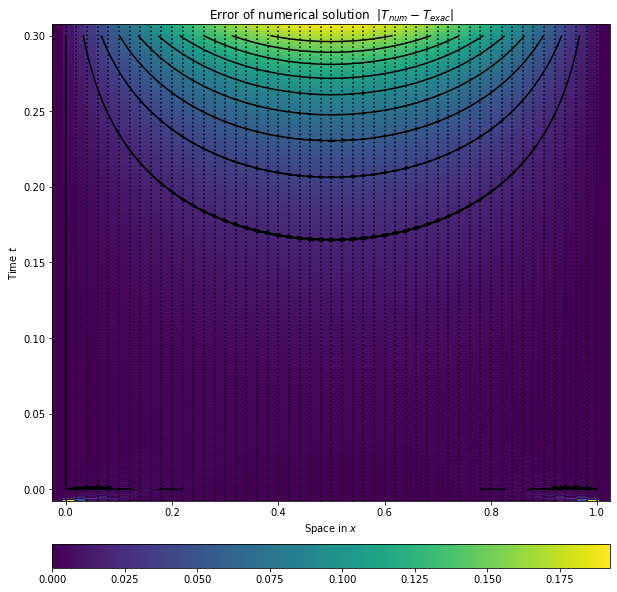

In [14]:
diff = np.abs(T-Tanalitic)
ax = plot_field(xmesh, tmesh, diff)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Time $t$")
ax.set_title(r"Error of numerical solution  $|T_{num}-T_{exac}|$")

### Exercicio 3


$$
\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2}
$$

No domínio 

$$\Omega = \underbrace{\left[0, \ 1\right]}_{x} \times \underbrace{\left[0, \ \infty\right)}_{t}$$

E condições de contorno

$$
T(0, \ t) = 1 \ \ \ \ \ \forall 0 \le t
$$
$$
T(1, \ t) = 0 \ \ \ \ \ \forall 0 \le t
$$

$$
T(x, \ 0) = 0 \ \ \ \ 0 < x < 1
$$

A solucao exata é dada por

$$
T_{exact}(x, \ t) = 1-x-\sum_{n=1}^{\infty} \dfrac{2}{n\pi} \cdot \exp \left(-n^2\pi^2 t\right) \cdot \sin \left(n\pi x\right)
$$

Então resolvemos numericamente

In [15]:
xmin, xmax = 0, 1
tmin, tmax = 0, 0.3
nx, nt = 51, 1497
dx = (xmax-xmin)/(nx-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nt, nx), dtype="float64")  # Result matrix
for i, xi in enumerate(xmesh):
    T[0, i] = 0
for j, tj in enumerate(tmesh):
    T[j, 0] = 1
    T[j, nx-1] = 0

stencilx = np.array([1, -2, 1]) * dt/dx**2
for j in range(nt-1):
    for i in range(1, nx-1):
        T[j+1, i] = T[j, i] + stencilx @ T[j, i-1:i+2]

In [16]:
Tanalitic = np.zeros(T.shape)
for n in range(1, 21):
    exppart = np.exp(-n**2*(np.pi**2)*tmesh)
    sinpart = np.sin(n*np.pi*xmesh)
    Tanalitic -= np.tensordot(exppart, sinpart, axes=0)/n
Tanalitic *= 2/np.pi
for i, xi in enumerate(xmesh):
    Tanalitic[:, i] += 1-xi

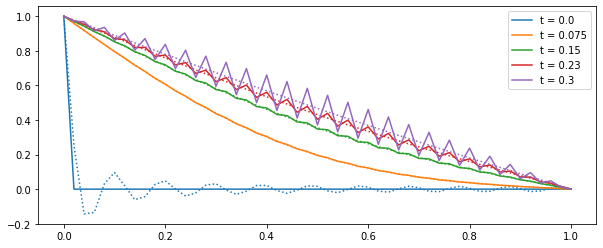

In [17]:
ncurves = 5
indexs = [int(curveindex) for curveindex in np.linspace(0, nt-1, ncurves)]
plt.figure(figsize=(10, 4))
for j in indexs:
    pl = plt.plot(xmesh, Tanalitic[j, :], ls="dotted")
    color = pl[0].get_color()
    plt.plot(xmesh, T[j, :], label=f"t = {tmesh[j]:.2}", color=color)
plt.legend()

Text(0.5, 1.0, 'Numerical solution $T_{num}$ at final time')

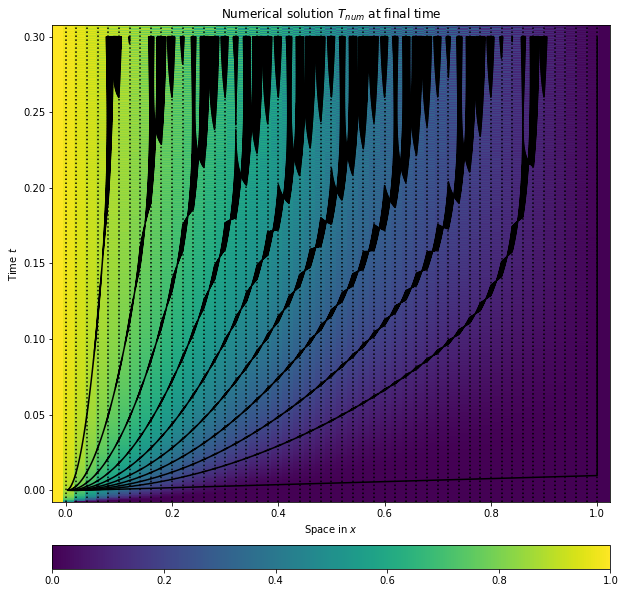

In [18]:
ax = plot_field(xmesh, tmesh, T)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Time $t$")
ax.set_title(r"Numerical solution $T_{num}$ at final time")

Text(0.5, 1.0, 'Error of numerical solution  $|T_{num}-T_{exac}|$')

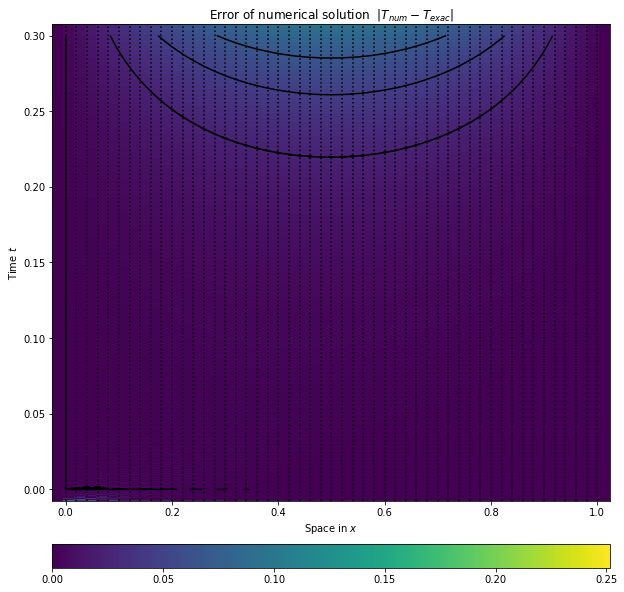

In [19]:
diff = np.abs(T-Tanalitic)
ax = plot_field(xmesh, tmesh, diff)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Time $t$")
ax.set_title(r"Error of numerical solution  $|T_{num}-T_{exac}|$")

### Exercice 4


$$
\dfrac{\partial T}{\partial t} = 0.01\cdot \dfrac{\partial^2 T}{\partial x^2}
$$

No dominio


$$\Omega = \underbrace{\left[0, \ 1\right]}_{x} \times \underbrace{\left[0, \ \infty\right)}_{t}$$

E condições de contorno

$$
T(0, \ t) = 0 \ \ \ \ \ \forall 0 \le t
$$
$$
T(1, \ t) = 0 \ \ \ \ \ \forall 0 \le t
$$

$$
T(x, \ 0) = \begin{cases} 200x \ \ \  \ \ \  \ \ \  \ \ \ \text{if}  \ \ \ \ 0 \le x \le 0.5 \\
200(1-x) \ \ \text{if} \ \ \ \  0.5 < x \le 1 \end{cases}
$$

A solução analítica é dada por

$$
T_{exact}(x, \ t) = \dfrac{800}{\pi^2}\sum_{n=0}^{\infty} \dfrac{(-1)^{n}}{(2n+1)^2} \cdot \exp \left(-(2n+1)^2\pi^2 \cdot 0.01 \cdot t\right) \cdot \sin \left((2n+1)\pi x\right)
$$

Então resolvemos numericamente

In [20]:
xmin, xmax = 0, 1
tmin, tmax = 0, 3
nx, nt = 11, 10001
dx = (xmax-xmin)/(nx-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nt, nx), dtype="float64")  # Result matrix
for i, xi in enumerate(xmesh):
    if xi > 0.5:
        T[0, i] = 200*(1-xi)
    else:
        T[0, i] = 200*xi
for j, tj in enumerate(tmesh):
    T[j, 0] = 0
    T[j, nx-1] = 0

stencilx = 0.01*np.array([1, -2, 1]) * dt/dx**2
for j in range(nt-1):
    for i in range(1, nx-1):
        T[j+1, i] = T[j, i] + stencilx @ T[j, i-1:i+2]

In [21]:
Tanalitic = np.zeros(T.shape)
for n in range(0, 21):
    exppart = np.exp(-(2*n+1)**2*(np.pi**2)*0.01*tmesh)
    sinpart = np.sin((2*n+1)*np.pi*xmesh)
    Tanalitic += (-1)**n * np.tensordot(exppart, sinpart, axes=0)/((2*n+1)**2)
Tanalitic *= 800/(np.pi**2)

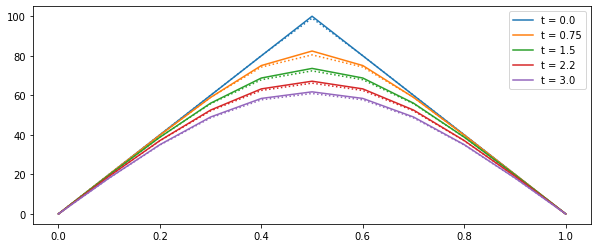

In [22]:
ncurves = 5
indexs = [int(curveindex) for curveindex in np.linspace(0, nt-1, ncurves)]
plt.figure(figsize=(10, 4))
for j in indexs:
    pl = plt.plot(xmesh, Tanalitic[j, :], ls="dotted")
    color = pl[0].get_color()
    plt.plot(xmesh, T[j, :], label=f"t = {tmesh[j]:.2}", color=color)
plt.legend()

Text(0.5, 1.0, 'Numerical solution $T_{num}$ at final time')

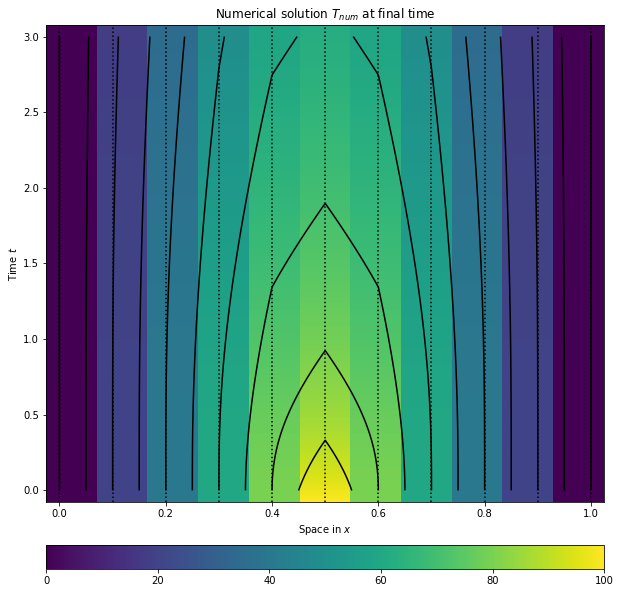

In [23]:
ax = plot_field(xmesh, tmesh, T)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Time $t$")
ax.set_title(r"Numerical solution $T_{num}$ at final time")

Text(0.5, 1.0, 'Error of numerical solution  $|T_{num}-T_{exac}|$')

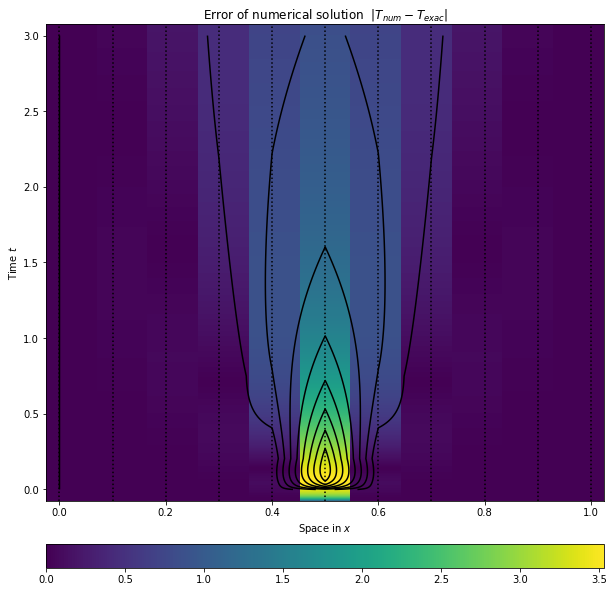

In [24]:
diff = np.abs(T-Tanalitic)
ax = plot_field(xmesh, tmesh, diff)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Time $t$")
ax.set_title(r"Error of numerical solution  $|T_{num}-T_{exac}|$")

### Exercice 5


$$
\dfrac{\partial T}{\partial t} = 0.01\cdot \dfrac{\partial^2 T}{\partial x^2} \ \ \ \ \ \forall \ (x, \ t) \ \text{on} \ \Omega = \left[0, \ 0.5\right] \times \left[0, \ \infty\right)
$$


No dominio


$$\Omega = \underbrace{\left[0, \ 1\right]}_{x} \times \underbrace{\left[0, \ \infty\right)}_{t}$$

E condições de contorno


$$
T(0, \ t) = 0 \ \ \ \ \ \forall \ 0 \le t
$$
$$
\left[\dfrac{\partial T}{\partial x}\right]_{x=0.5}= 0 \ \ \ \ \ \forall \ 0 \le t
$$
$$
T(x, \ 0) = 200x \ \ \ \ \ \forall  \ 0 \le x \le 0.5
$$

A solução analítica é dada por

$$
T_{exact}(x, \ t) = \dfrac{800}{\pi^2}\sum_{n=0}^{\infty} \dfrac{(-1)^{n}}{(2n+1)^2} \cdot \exp \left(-(2n+1)^2\pi^2 \cdot 0.01 \cdot t\right) \cdot \sin \left((2n+1)\pi x\right)
$$

Então resolvemos numericamente


Neste caso temos uma diferença pois envolve a condição de Neumann (da derivada) e precisamos de uma reformulação.

Como a derivada em $x$ pode ser descrita na borda $x = x_{n-1} = 0.5$ por:

$$
\left[\dfrac{\partial T}{\partial x}\right]_{x=x_{n-1}} \approx \dfrac{T_{j,n-1} - T_{j,n-2}}{\delta x}
$$

Dizendo que tal derivada é nula na borda $x_{n-1} = 0.5$, então isso implica que o ponto logo à esquerda de $T_{j,n-1}$, que é $T_{j,n-2}$ é igual ao valor da borda:

$$
\left[\dfrac{\partial T}{\partial x}\right]_{x=x_{n-1}}  = 0 \Longrightarrow T_{j,n-1} = T_{j,n-2}
$$

Então, para cada passo no tempo $t_j$, atualizamos o valor de $T_{j,n-1}$ como sendo o valor de $T_{j,n-2}$

In [25]:
xmin, xmax = 0, 0.5
tmin, tmax = 0, 3
nx, nt = 21, 20000
dx = (xmax-xmin)/(nx-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nt, nx), dtype="float64")  # Result matrix
for j, tj in enumerate(tmesh):
    T[j, 0] = 0
for i, xi in enumerate(xmesh):
    T[0, i] = 200*xi


stencilx = 0.01*np.array([1, -2, 1]) * dt/dx**2
for j in range(nt-1):
    for i in range(1, nx-1):
        T[j+1, i] = T[j, i] + stencilx @ T[j, i-1:i+2]
    T[j+1, nx-1] = T[j+1, nx-2]

In [26]:
Tanalitic = np.zeros(T.shape)
for n in range(0, 21):
    exppart = np.exp(-(2*n+1)**2*(np.pi**2)*0.01*tmesh)
    sinpart = np.sin((2*n+1)*np.pi*xmesh)
    Tanalitic += (-1)**n * np.tensordot(exppart, sinpart, axes=0)/((2*n+1)**2)
Tanalitic *= 800/(np.pi**2)

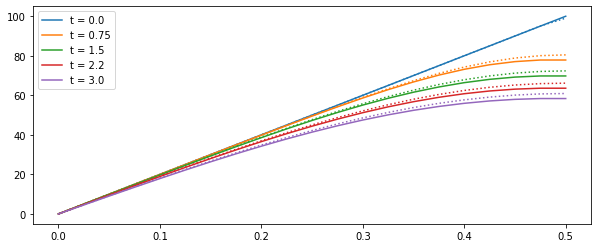

In [27]:
ncurves = 5
indexs = [int(curveindex) for curveindex in np.linspace(0, nt-1, ncurves)]
plt.figure(figsize=(10, 4))
for j in indexs:
    pl = plt.plot(xmesh, Tanalitic[j, :], ls="dotted")
    color = pl[0].get_color()
    plt.plot(xmesh, T[j, :], label=f"t = {tmesh[j]:.2}", color=color)
plt.legend()

Text(0.5, 1.0, 'Numerical solution $T_{num}$ at final time')

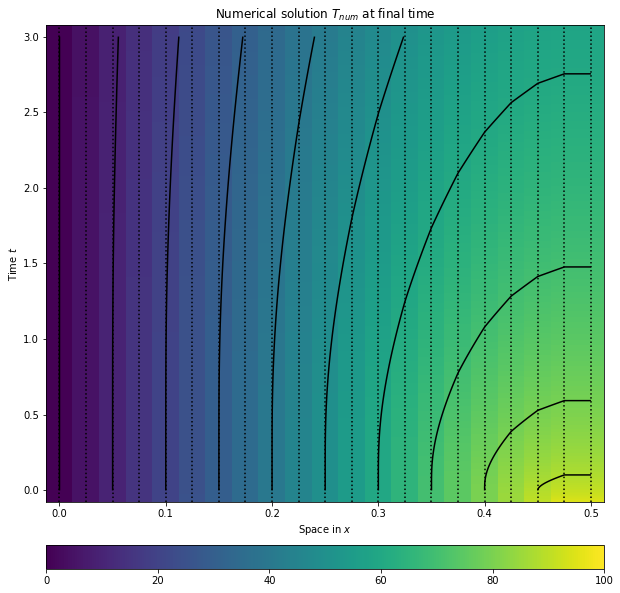

In [28]:
ax = plot_field(xmesh, tmesh, T)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Time $t$")
ax.set_title(r"Numerical solution $T_{num}$ at final time")

Text(0.5, 1.0, 'Error of numerical solution  $|T_{num}-T_{exac}|$')

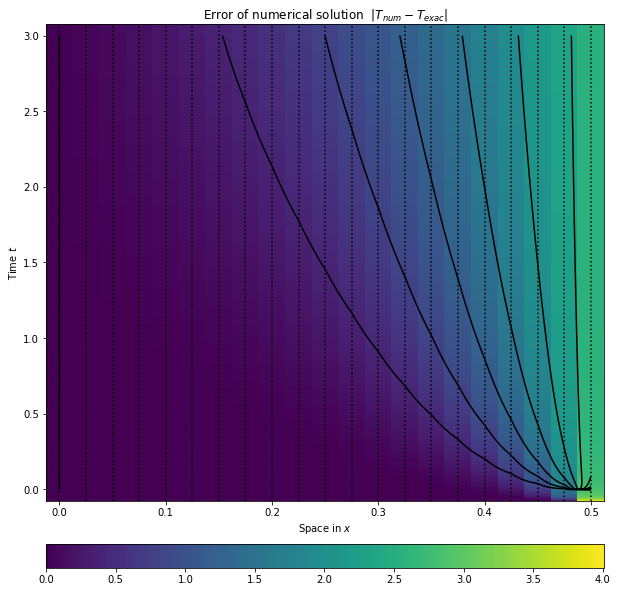

In [29]:
diff = np.abs(T-Tanalitic)
ax = plot_field(xmesh, tmesh, diff)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Time $t$")
ax.set_title(r"Error of numerical solution  $|T_{num}-T_{exac}|$")

### Exercicio 6

$$
\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2}+\dfrac{\partial^2 T}{\partial y^2}
$$

No domínio

$$
\Omega = \left[0,\ 1\right]\times\left[0,\ 1\right]\times\left[0,\ \infty\right)
$$

E condições iniciais

\begin{align*}
T(x, \ 0, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\
T(x, \ 1, \ t) & = \sin \left(\pi x\right) \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right)  \\
T(0, \ y, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\
T(1, \ y, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right)\\
T(x, \ y, \ 0) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ y\right) \in \left[0, \ 1\right]\times\left[0, \ 1\right]
\end{align*}

A solução analítica estacionária quando $t\to \infty$ é dada por

$$
T_{analitic}(x, \ y,\ t\to \infty) = \dfrac{\sinh (\pi y) \sin (\pi x)}{\sinh \pi}
$$

Então resolvemos numericamente

In [30]:
xmin, xmax = 0, 1
ymin, ymax = 0, 1
tmin, tmax = 0, 3
nx, ny, nt = 10, 11, 1500
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
ymesh = np.linspace(ymin, ymax, ny)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nt, ny, nx), dtype="float64")  # Result matrix
T[:, ny-1] = np.sin(np.pi*xmesh)

stencilx = np.array([1, -2, 1])*dt/(dx**2)
stencily = np.array([1, -2, 1])*dt/(dy**2)
for k in tqdm.tqdm(range(nt-1)):
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            T[k+1, j, i] = T[k, j, i] + stencilx @ T[k, j, i-1:i+2] + stencily @ T[k, j-1:j+2, i]

100%|██████████| 1499/1499 [00:00<00:00, 3539.07it/s]


In [31]:
sinhpiy = np.sinh(np.pi*ymesh)
sinpix = np.sin(np.pi*xmesh)
Tanalitic = np.tensordot(sinhpiy, sinpix, axes=0)/np.sinh(np.pi)

Text(0.5, 1.0, 'Numerical solution $T_{num}$ at final time')

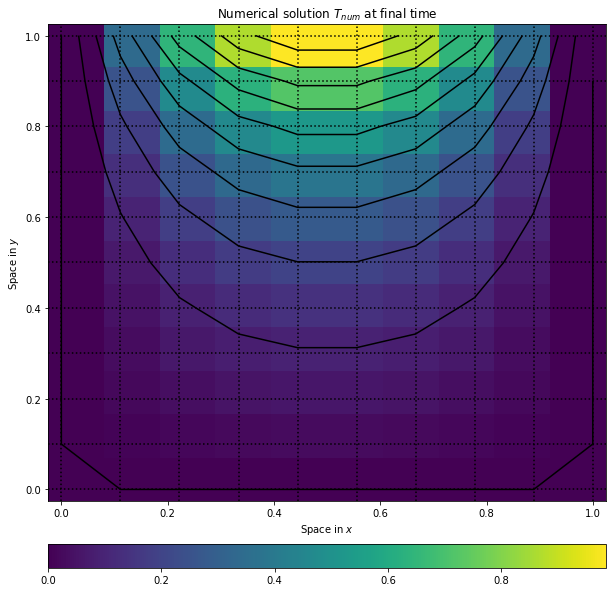

In [32]:
ax = plot_field(xmesh, ymesh, T[-1])
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[ax.axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Space in $y$")
ax.set_title(r"Numerical solution $T_{num}$ at final time")

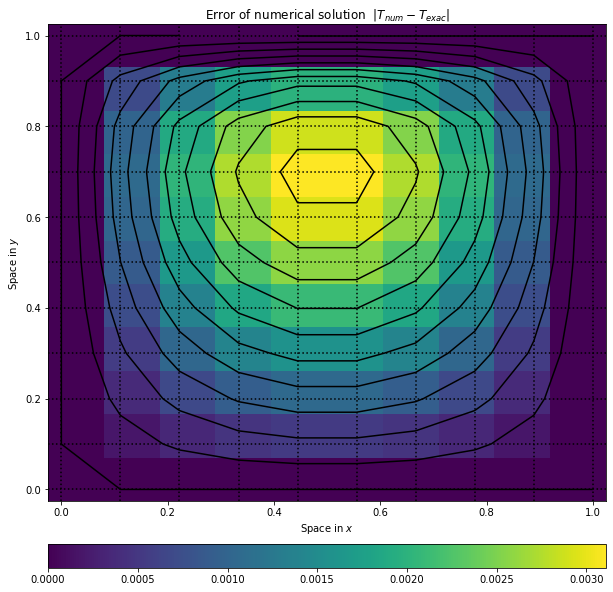

In [33]:
diff = np.abs(T[-1]-Tanalitic)
ax = plot_field(xmesh, ymesh, diff)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[ax.axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Space in $y$")
ax.set_title(r"Error of numerical solution  $|T_{num}-T_{exac}|$")
index = np.where(diff == np.max(diff))

### Exercicio 7

$$
\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2}+\dfrac{\partial^2 T}{\partial y^2}
$$

No domínio

$$
\Omega = \left[0,\ 0.5\right]\times\left[0,\ 1\right]\times\left[0,\ \infty\right)
$$

E condições iniciais

\begin{align*}
T(x, \ 0, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ \frac{1}{2}\right]\times\left[0,\ \infty\right) \\
T(x, \ 1, \ t) & = \sin \left(\pi x\right) \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ \frac{1}{2}\right]\times\left[0,\ \infty\right)  \\
T(0, \ y, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\
\dfrac{\partial T}{\partial x}\left(\frac{1}{2}, \ y, \ t\right) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right)\\
T(x, \ y, \ 0) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ y\right) \in \left[0, \ \frac{1}{2}\right]\times\left[0, \ 1\right]
\end{align*}

A solução analítica estacionária quando $t\to \infty$ é dada por

$$
T_{analitic}(x, \ y,\ t\to \infty) = \dfrac{\sinh (\pi y) \sin (\pi x)}{\sinh \pi}
$$

Então resolvemos numericamente

In [34]:
xmin, xmax = 0, 0.5
ymin, ymax = 0, 1
tmin, tmax = 0, 3
nx, ny, nt = 31, 31, 30001
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
ymesh = np.linspace(ymin, ymax, ny)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nt, ny, nx), dtype="float64")  # Result matrix
for k, tk in enumerate(tmesh):
    T[k, ny-1, :] = np.sin(np.pi*xmesh)
stencilx = np.array([1, -2, 1])*dt/(dx**2)
stencily = np.array([1, -2, 1])*dt/(dy**2)
for k in tqdm.tqdm(range(nt-1)):
    T[k+1, 1:-1, 1:-1] = (1+stencilx[1]+stencily[1]) * T[k, 1:-1, 1:-1]
    T[k+1, 1:-1, 1:-1] += stencily[0] * T[k, 0:-2, 1:-1]
    T[k+1, 1:-1, 1:-1] += stencily[2] * T[k, 2:, 1:-1]
    T[k+1, 1:-1, 1:-1] += stencilx[0] * T[k, 1:-1, 0:-2]
    T[k+1, 1:-1, 1:-1] += stencilx[2] * T[k, 1:-1, 2:]
    T[k+1, :, nx-1] = T[k+1, :, nx-2]

100%|██████████| 30000/30000 [00:01<00:00, 20583.29it/s]


In [35]:
sinhpiy = np.sinh(np.pi*ymesh)
sinpix = np.sin(np.pi*xmesh)
Tanalitic = np.tensordot(sinhpiy, sinpix, axes=0)/np.sinh(np.pi)

Text(0.5, 1.0, 'Numerical solution $T_{num}$ at final time')

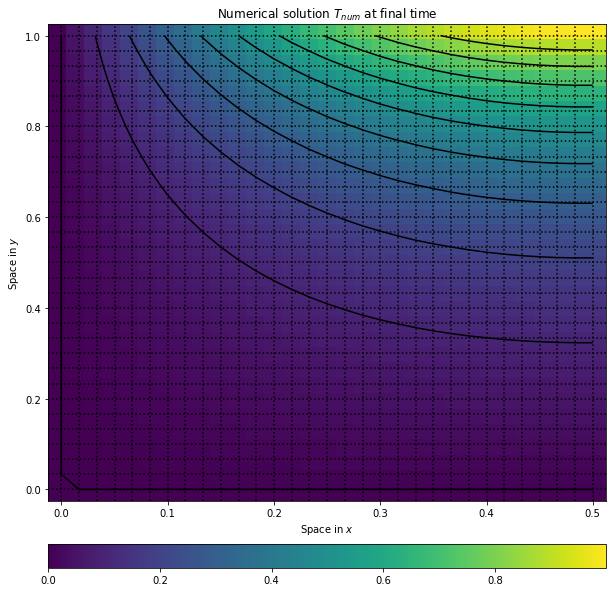

In [36]:
ax = plot_field(xmesh, ymesh, T[-1])
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[ax.axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Space in $y$")
ax.set_title(r"Numerical solution $T_{num}$ at final time")

Text(0.5, 1.0, 'Error of numerical solution  $|T_{num}-T_{exac}|$')

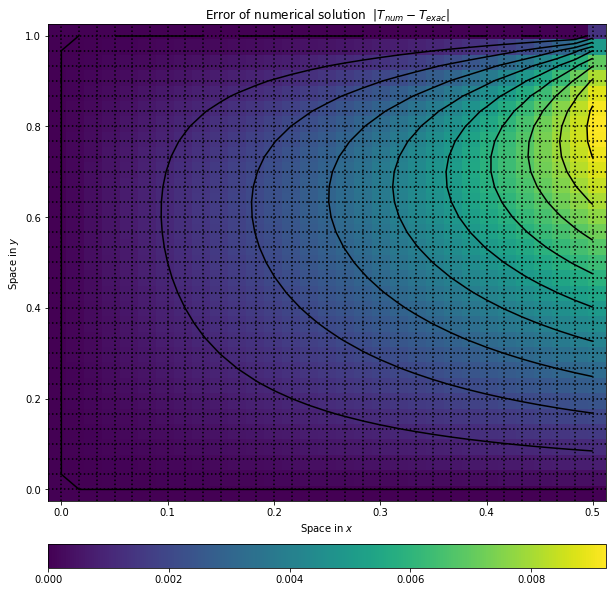

In [37]:
diff = np.abs(T[-1]-Tanalitic)
ax = plot_field(xmesh, ymesh, diff)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[ax.axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Space in $y$")
ax.set_title(r"Error of numerical solution  $|T_{num}-T_{exac}|$")

### Exercicio 8

$$
\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2}+\dfrac{\partial^2 T}{\partial y^2}
$$

No domínio

$$
\Omega = \underbrace{\left[0, \ 1\right]}_{x} \times \underbrace{\left[0, \ 1\right]}_{y} \times \underbrace{\left[0, \ \infty\right)}_{t}
$$

And boundary conditions

\begin{align*}
T(x, \ 0, \ t) & = 0  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\
T(x, \ 1, \ t) & = \begin{cases}75x  \ \ \ \ \  \ \ \ \ \  \ \ \ \ \  \ \ \forall \left(x, \ t\right) \in \left[0, \ \frac{2}{3}\right]\times\left[0,\ \infty\right)  \\150(1-x)  \ \ \ \ \ \forall \left(x, \ t\right) \in \left(\frac{2}{3}, \ 1\right]\times\left[0,\ \infty\right) \end{cases} \\
T(0, \ y, \ t) & = 0  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\
T(1, \ y, \ t) & = 0   \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right)\\
T(x, \ y, \ 0) & = 0   \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ y\right) \in \left[0, \ 1\right]\times\left[0, \ 1\right]
\end{align*}


A solução analítica estacionária quando $t\to \infty$ é dada por

$$
T_{exact}(x, \ y,\ t\to \infty) = \dfrac{450}{\pi^2} \cdot \sum_{n=1}^{\infty}\dfrac{\sin \frac{2}{3}n\pi}{n^2 \sinh n\pi} \cdot \sinh (n\pi y) \sin (n \pi x)
$$

Então resolvemos numericamente

In [38]:
xmin, xmax = 0, 1
ymin, ymax = 0, 1
tmin, tmax = 0, 10
nx, ny, nt = 41, 51, 100001
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
ymesh = np.linspace(ymin, ymax, ny)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nt, ny, nx), dtype="float64")  # Result matrix
for k, tk in enumerate(tmesh):
    T[k, ny-1, :] = 75*xmesh * (xmesh <= 2/3) +  150*(1-xmesh) * (xmesh >= 2/3) 

stencilx = np.array([1, -2, 1])*dt/(dx**2)
stencily = np.array([1, -2, 1])*dt/(dy**2)
for k in tqdm.tqdm(range(nt-1)):
    T[k+1, 1:-1, 1:-1] = (1+stencilx[1]+stencily[1]) * T[k, 1:-1, 1:-1]
    T[k+1, 1:-1, 1:-1] += stencily[0] * T[k, 0:-2, 1:-1]
    T[k+1, 1:-1, 1:-1] += stencily[2] * T[k, 2:, 1:-1]
    T[k+1, 1:-1, 1:-1] += stencilx[0] * T[k, 1:-1, 0:-2]
    T[k+1, 1:-1, 1:-1] += stencilx[2] * T[k, 1:-1, 2:]

100%|██████████| 100000/100000 [00:06<00:00, 14788.28it/s]


In [39]:
Tanalitic = np.zeros((ny, nx), dtype="float64")
for n in range(1, 41):
    const = np.sin(2*n*np.pi/3) / (n**2 * np.sinh(n*np.pi))
    sinnpix = np.sin(n*np.pi*xmesh)
    sinhnpiy = np.sinh(n*np.pi*ymesh)
    Tanalitic += const * np.tensordot(sinhnpiy, sinnpix, axes=0)
Tanalitic *= 450/np.pi**2

Text(0.5, 1.0, 'Numerical solution $T_{num}$ at final time')

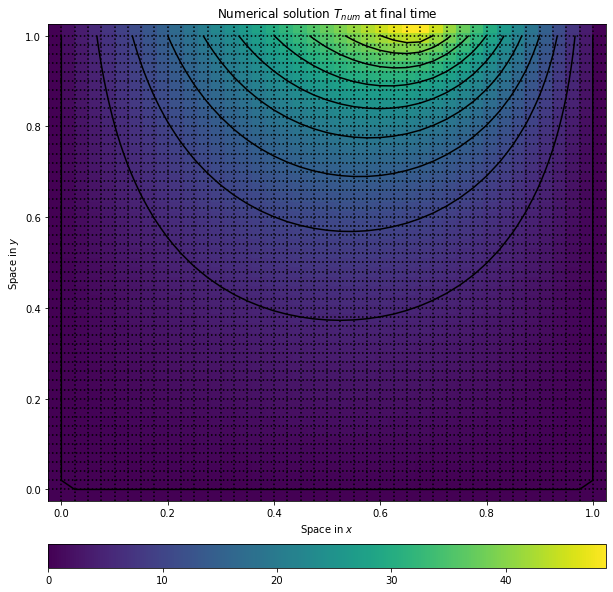

In [40]:
ax = plot_field(xmesh, ymesh, T[-1])
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[ax.axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Space in $y$")
ax.set_title(r"Numerical solution $T_{num}$ at final time")

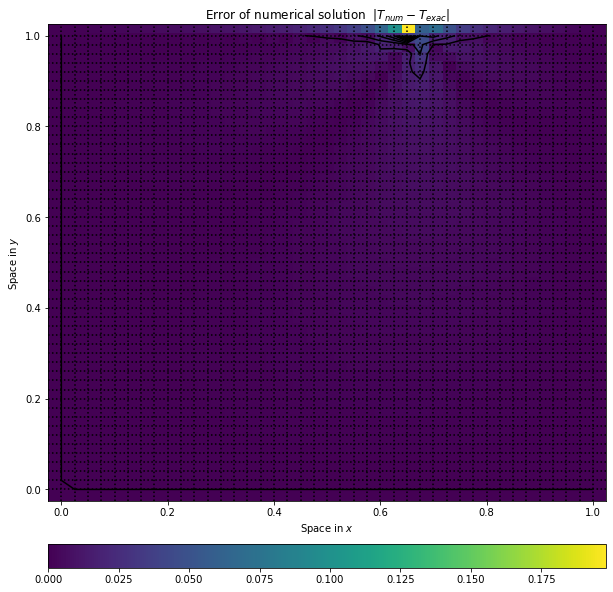

In [41]:
diff = np.abs(T[-1]-Tanalitic)
ax = plot_field(xmesh, ymesh, diff)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[ax.axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Space in $y$")
ax.set_title(r"Error of numerical solution  $|T_{num}-T_{exac}|$")
index = np.where(diff == np.max(diff))

### Exercicio 9

$$
\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2}+\dfrac{\partial^2 T}{\partial y^2}
$$

No domínio

\begin{align*}
S & = \left[0, \ 1\right] \times \left[0, \ 1\right] \\
C & = \left[0.4, \ 0.6\right] \times \left[0.4, \ 0.6\right]  \\
\Omega & = \left(S \setminus C \right) \times \left[0, \ \infty\right) \\
\end{align*}

And boundary conditions

\begin{align*}
T(x, \ 0, \ t) & = 0  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\
T(x, \ 1, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\
T(0, \ y, \ t) & = 0  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\
T(1, \ y, \ t) & = 0   \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right)\\
T(x, \ y, \ 0) & = 0   \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ y\right) \in  \left(S \setminus C \right) \\
T(x, \ y, \ 0) & = 1   \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ y\right) \in C
\end{align*}


A solução analítica estacionária quando $t\to \infty$ é dada por

$$
T_{exact}(x, \ y,\ t\to \infty) = \dfrac{450}{\pi^2} \cdot \sum_{n=1}^{\infty}\dfrac{\sin \frac{2}{3}n\pi}{n^2 \sinh n\pi} \cdot \sinh (n\pi y) \sin (n \pi x)
$$

Então resolvemos numericamente

In [42]:
xmin, xmax = 0, 1
ymin, ymax = 0, 1
tmin, tmax = 0, 3
nx, ny, nt = 31, 31, 15001
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
ymesh = np.linspace(ymin, ymax, ny)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nt, ny, nx), dtype="float64")  # Result matrix
xmask = (0.4 <= xmesh) * (xmesh <= 0.6)
ymask = (0.4 <= ymesh) * (ymesh <= 0.6)
Cmask = np.tensordot(ymask, xmask, axes=0)
Imask = ~Cmask[1:-1, 1:-1]
for k, tk in enumerate(tmesh):
    T[k, :, :] = Cmask

stencilx = np.array([1, -2, 1])*dt/(dx**2)
stencily = np.array([1, -2, 1])*dt/(dy**2)
for k in tqdm.tqdm(range(nt-1)):
    T[k+1, 1:-1, 1:-1] += Imask * (1+stencilx[1]+stencily[1]) * T[k, 1:-1, 1:-1]
    T[k+1, 1:-1, 1:-1] += Imask*stencily[0] * T[k, 0:-2, 1:-1]
    T[k+1, 1:-1, 1:-1] += Imask*stencily[2] * T[k, 2:, 1:-1]
    T[k+1, 1:-1, 1:-1] += Imask*stencilx[0] * T[k, 1:-1, 0:-2]
    T[k+1, 1:-1, 1:-1] += Imask*stencilx[2] * T[k, 1:-1, 2:]

100%|██████████| 15000/15000 [00:00<00:00, 16308.98it/s]


Text(0.5, 1.0, 'Numerical solution $T_{num}$ at final time')

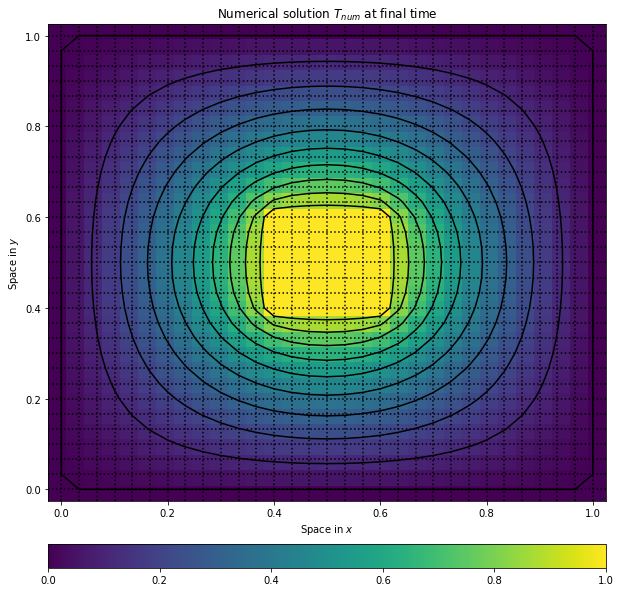

In [43]:
ax = plot_field(xmesh, ymesh, T[-1])
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[ax.axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Space in $y$")
ax.set_title(r"Numerical solution $T_{num}$ at final time")

# Sistemas de Equações Lineares

### Exercicio 10

Use o método de Gauss-Seidel para resolver o seguinte sistema:

$$
\begin{bmatrix}
12 & -2 & 3 & -1 \\
1 & 6 & 20 & -4 \\
-2 & 15 & 6 & -3 \\
0 & -3 & 2 & 9
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3\\
x_4
\end{bmatrix}=
\begin{bmatrix}
0 \\
20\\
0\\
0
\end{bmatrix}
$$

A solução deste sistema é dada por

$$
X^{\star} =
\dfrac{1}{2653}
\begin{bmatrix}
-1092 \\ -1556 \\ 2940 \\ -1172
\end{bmatrix}
\approx 
\begin{bmatrix}
-0.4116  \\ -5865 \\ 1.1082 \\ -0.4418
\end{bmatrix}
$$

In [44]:
A = [[12, -2,  3, -1],
     [ 1,  6, 20, -4],
     [-2, 15,  6, -3],
     [ 0, -3,  2,  9]]
B = [0, 20, 0, 0]
A = np.array(A, dtype="float64")
B = np.array(B, dtype="float64")
Xstar = np.array([-1092, -1556, 2940, -1172], dtype="float64")/2653
print(f"norm L2 (A * Xstar - B) = {np.linalg.norm(A@Xstar-B):.2e}")

norm L2 (A * Xstar - B) = 1.33e-15


##### Método de Jacobi

O método de Jacobi consiste em fazer iterações de modo:

$$
\left[X_{k+1}\right]_{i} = 
\left[X_{k}\right]_{i} + \dfrac{1}{\left[A\right]_{ii}} \cdot \left(\left[B\right]_{i} - \sum_{\begin{smallmatrix}j=1\\ j\ne i\end{smallmatrix}}^{n}  \left[A\right]_{ij} \left[X_{k}\right]_{j}  \right) 
$$

Ou de forma matricial, seja $L$ a matrix triangular inferior, $D$ a diagonal, e $U$ a triangular superior de $A$, então podemos reescrever

$$
X_{k+1} = D^{-1} \left(B - \left(L+U\right) \cdot X_{k}\right)
$$

ou reescrevendo

$$X_{k+1} = T \cdot X_{k} + C$$

Sendo

\begin{align*}
T & = - D^{-1} \cdot (L+U)\\
C & = D^{-1} \cdot B
\end{align*}

In [45]:
def Jacobi(A: np.ndarray, B: np.ndarray, X0: np.ndarray, atol: float) -> Tuple[np.ndarray, int]:
    if atol < 0 :
        raise ValueError
    d = np.diag(A)
    n = len(d)
    D = np.diag(d)
    Dinv = np.diag(1/d)
    U = np.triu(A)-D
    L = np.tril(A)-D
    T = Dinv @ (L+U)
    C = Dinv @ B
    iteration = 0
    itermax = 200
    Xnew = np.copy(X0)
    while True:
        for i in range(n):
            Ri = B[i]
            Ri -= sum(A*X0)
            Ri /= A[i,i]
            Xnew[i] = X0[i] + Ri
        if np.max(np.abs(Xnew-X0)) < atol:
            return Xnew, iteration
        iteration += 1
        if iteration > itermax:
            eigs, _ = np.linalg.eig(-Dinv @ (L+U))
            error_msg = f"Jacobi doesn't converge. rho(D^-1 @ (L+U)) = {np.max(np.abs(eigs))}"
            raise ValueError(error_msg)


##### Método de Gauss-Seidel

Para este método, temos

$$
X_{k+1} = (D+L)^{-1} \left(B - U \cdot X_{k}\right)
$$

ou reescrevendo

$$X_{k+1} = T \cdot X_{k} + C$$

Sendo

\begin{align*}
T & = - (D+L)^{-1} \cdot U\\
C & = (D+L)^{-1} \cdot B
\end{align*}

A parte mais custosa deste método é encontrar a inversa de $D+L$, mas como esta matriz é triangular, é mais facil de inverter:

$$
D+L = \begin{bmatrix}
a_{1,1} & 0 & 0 & \cdots & 0 & 0\\
a_{2,1} & a_{2,2} & 0 & \cdots & 0 & 0 \\
a_{3,1} & a_{3,2} & a_{3,3} & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
a_{n-1,1} & a_{n-1,2} & a_{n-1,3} & \cdots & a_{n-1,n-1} & 0 \\
a_{n,1} & a_{n,2} & a_{n,3} & \cdots & a_{n,n-1} & a_{n,n} \\
\end{bmatrix}
$$
$$
M = (D+L)^{-1} = \begin{bmatrix}
m_{1,1} & 0 & 0 & \cdots & 0 & 0\\
m_{2,1} & m_{2,2} & 0 & \cdots & 0 & 0 \\
m_{3,1} & m_{3,2} & m_{3,3} & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
m_{n-1,1} & m_{n-1,2} & m_{n-1,3} & \cdots & m_{n-1,n-1} & 0 \\
m_{n,1} & m_{n,2} & m_{n,3} & \cdots & m_{n,n-1} & m_{n,n} \\
\end{bmatrix}
$$


In [46]:
def GaussSeidel(A: np.ndarray, B: np.ndarray, X0: np.ndarray, atol: float) -> Tuple[np.ndarray, int]:
    if atol < 0 :
        raise ValueError
    d = np.diag(A)
    n = len(d)
    D = np.diag(d)
    U = np.triu(A)-D
    L = np.tril(A)-D

    iteration = 0
    itermax = 200
    Xnew = np.copy(X0)
    while True:
        for i in range(n):
            Ri = B[i]
            Ri -= sum(A[i,:i]*Xnew[:i])
            Ri -= sum(A[i,i:]*X0[i:])
            Ri /= A[i,i]
            Xnew[i] = X0[i] + Ri 
        if np.max(np.abs(Xnew-X0)) < atol:
            return Xnew, iteration
        X0 = np.copy(Xnew)
        iteration += 1
        if iteration > itermax:
            eigs, _ = np.linalg.eig(-np.linalg.inv(D+L) @ (U))
            error_msg = f"Gauss Seidel doesn't converge. rho((D+L)^-1 @ U) = {np.max(np.abs(eigs))}"
            raise ValueError(error_msg)

##### SOR 

$$
X_{k+1} = X_{k} - \omega \left(D+L\right)^{-1} U X_{k} +  \omega (D+L)^{-1} B
$$

In [47]:
def SORMethod(A: np.ndarray, B: np.ndarray, X0: np.ndarray, omega: float, atol: float):
    if atol < 0 :
        raise ValueError
    d = np.diag(A)
    n = len(d)
    D = np.diag(d)
    U = np.triu(A)-D
    L = np.tril(A)-D

    iteration = 0
    itermax = 200
    Xnew = np.copy(X0)
    while True:
        for i in range(n):
            Ri = B[i]
            Ri -= sum(A[i,:i]*Xnew[:i])
            Ri -= sum(A[i,i:]*X0[i:])
            Ri /= A[i,i]
            Xnew[i] = X0[i] + omega*Ri 
        if np.max(np.abs(Xnew-X0)) < atol:
            return Xnew, iteration
        X0 = np.copy(Xnew)
        iteration += 1
        if iteration > itermax:
            eigs, _ = np.linalg.eig(-np.linalg.inv(D+L) @ (U))
            error_msg = f"SOR doesn't converge. rho(omega*(D+L)^-1 @ U) = {np.max(np.abs(eigs))}"
            raise ValueError(error_msg)

##### Gradiente Conjugado

In [48]:
def GradienteConjugado(A: np.ndarray, B: np.ndarray, X0: np.ndarray, atol: float):
    if atol < 0 :
        raise ValueError
    d = np.diag(A)
    n = len(d)
    D = np.diag(d)
    U = np.triu(A)-D
    L = np.tril(A)-D

    iteration = 0
    itermax = 200
    R0 = B - A @ X0
    P0 = np.copy(R0)
    while True:
        alpha = np.inner(R0, R0)/np.inner(P0, A @ P0)
        Xnew = X0 + alpha * P0
        Rnew = R0 - alpha * A @ P0
        if np.max(np.abs(Rnew)) < atol:
            return Xnew, iteration
        beta = np.inner(Rnew, Rnew)/np.inner(R0, R0)
        P0 = Rnew + beta * P0
        R0 = np.copy(Rnew)
        X0 = np.copy(Xnew)
        iteration += 1
        if iteration > itermax:
            error_msg = f"Gradiente Conjulgado nao converge"
            raise ValueError(error_msg)

# Equação do Calor 2D (Permanente)

### Exercício 12

In [49]:
xmin, xmax = 0, 1
ymin, ymax = 0, 1
nx, ny = 10, 12
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
xmesh = np.linspace(xmin, xmax, nx)
ymesh = np.linspace(ymin, ymax, ny)
T = np.empty((ny, nx), dtype="object")
K = np.zeros((ny, nx, ny, nx))
F = np.zeros((ny, nx), dtype="float64")
stencil = np.array([[0, dx/dy, 0],
                    [dy/dx, -2*(dy/dx+dx/dy), dy/dx],
                    [0, dx/dy, 0]], dtype="float64")
T[:, 0] = 0  # x = 0
T[:, nx-1] = 0  # x = 1
T[0, :] = 0  # y = 0
T[ny-1, :] = 1  # y = 1

for i in range(1, nx-1):
    for j in range(1, ny-1):
        K[j, i, j-1:j+2, i-1:i+2] = stencil[:, :]

mexp = (T == None).flatten()
Kexp = K.reshape((ny*nx, ny*nx))
Fexp = F.reshape(ny*nx)
Texp = T.reshape(ny*nx)
Kuu = np.delete(np.delete(Kexp, ~mexp, axis=0), ~mexp, axis=1)
Kku = np.delete(np.delete(Kexp, mexp, axis=0), ~mexp, axis=1)
Kuk = np.delete(np.delete(Kexp, ~mexp, axis=0), mexp, axis=1)
Kkk = np.delete(np.delete(Kexp, mexp, axis=0), mexp, axis=1)
Texp[mexp] = np.linalg.solve(Kuu, (Fexp[mexp] - Kuk @ Texp[~mexp]).astype("float64"))
Fexp[~mexp] = Kku @ Texp[mexp] + Kkk @ Texp[~mexp]
T = Texp.reshape((ny, nx))
F = Fexp.reshape((ny, nx))

Text(0.5, 1.0, 'Numerical solution $T_{num}$ at final time')

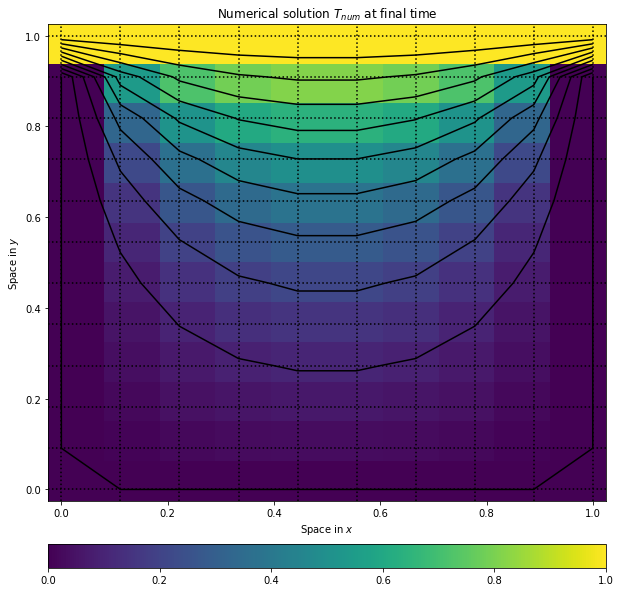

In [50]:
ax = plot_field(xmesh, ymesh, T)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[ax.axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Space in $y$")
ax.set_title(r"Numerical solution $T_{num}$ at final time")

### Exercicio 13

In [51]:
xmin, xmax = 0, 1
ymin, ymax = 0, 1
nx, ny = 65, 71
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
xmesh = np.linspace(xmin, xmax, nx)
ymesh = np.linspace(ymin, ymax, ny)
T = np.empty((ny, nx), dtype="object")
K = np.zeros((ny, nx, ny, nx))
F = np.zeros((ny, nx), dtype="float64")
stencil = np.array([[0, dx/dy, 0],
                    [dy/dx, -2*(dy/dx+dx/dy), dy/dx],
                    [0, dx/dy, 0]], dtype="float64")
T[:, 0] = 0  # x = 0
T[:, nx-1] = 0  # x = 1
T[0, :] = 0  # y = 0
T[ny-1, :] = 0  # y = 1

for i in range(1, nx-1):
    for j in range(1, ny-1):
        K[j, i, j-1:j+2, i-1:i+2] = stencil[:, :]
F[:, :] = -2*np.pi**2 *dy*dx* np.tensordot(np.sin(np.pi*ymesh), np.sin(np.pi*xmesh), axes=0)

mexp = (T == None).flatten()
Kexp = K.reshape((ny*nx, ny*nx))
Fexp = F.reshape(ny*nx)
Texp = T.reshape(ny*nx)
Kuu = np.delete(np.delete(Kexp, ~mexp, axis=0), ~mexp, axis=1)
Kku = np.delete(np.delete(Kexp, mexp, axis=0), ~mexp, axis=1)
Kuk = np.delete(np.delete(Kexp, ~mexp, axis=0), mexp, axis=1)
Kkk = np.delete(np.delete(Kexp, mexp, axis=0), mexp, axis=1)
Texp[mexp] = np.linalg.solve(Kuu, (Fexp[mexp] - Kuk @ Texp[~mexp]).astype("float64"))
Fexp[~mexp] = Kku @ Texp[mexp] + Kkk @ Texp[~mexp]
T = Texp.reshape((ny, nx))
F = Fexp.reshape((ny, nx))

In [52]:
Tanalitic = np.tensordot(np.sin(np.pi*ymesh), np.sin(np.pi*xmesh), axes=0)

Text(0.5, 1.0, 'Numerical solution $T_{num}$ at final time')

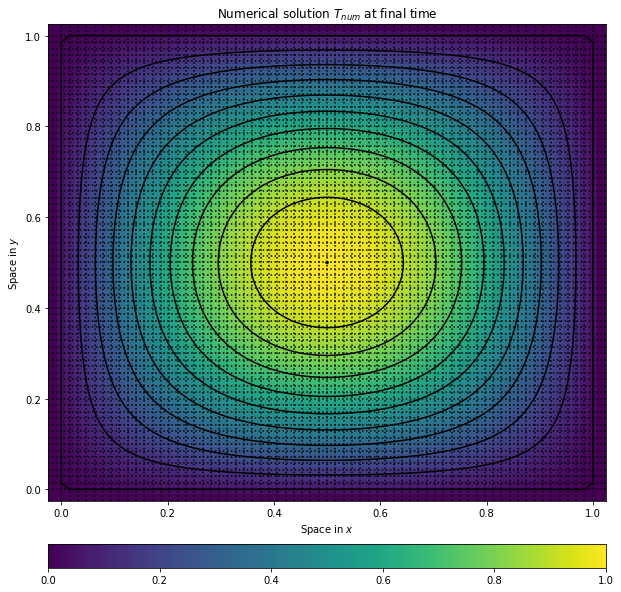

In [53]:
ax = plot_field(xmesh, ymesh, T)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[ax.axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Space in $y$")
ax.set_title(r"Numerical solution $T_{num}$ at final time")

Text(0.5, 1.0, 'Error')

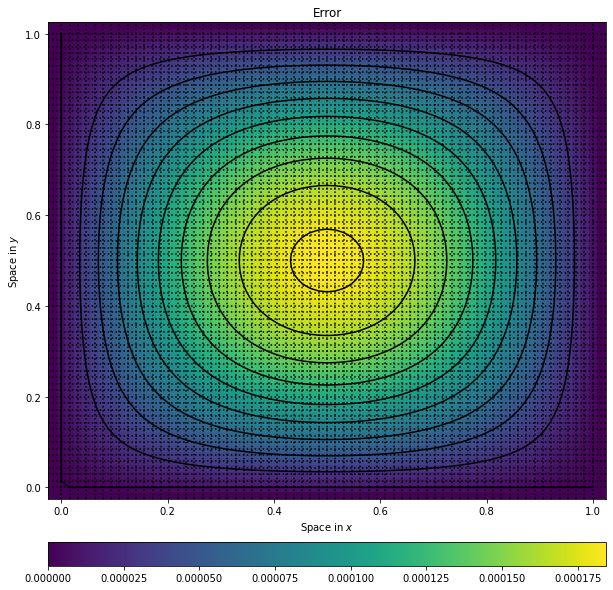

In [54]:
diff = np.abs(T-Tanalitic)
ax = plot_field(xmesh, ymesh, diff)
[ax.axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[ax.axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
ax.set_xlabel("Space in $x$")
ax.set_ylabel("Space in $y$")
ax.set_title(r"Error")